### Inspecting Datasets

In [1]:
# Load libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Importing Datasets
food_consumption=pd.read_csv('food_consumption.csv', index_col='Unnamed: 0')
print(food_consumption.head(), end='\n \n')
print('_____'*10)
#See the shape of the Data Frame 
print(f'Data Shape is : {food_consumption.shape}\nNumber of rows is : {food_consumption.shape[0]}\nNumber of culomns is : {food_consumption.shape[1]}')

     country food_category  consumption  co2_emission
1  Argentina          pork        10.51         37.20
2  Argentina       poultry        38.66         41.53
3  Argentina          beef        55.48       1712.00
4  Argentina     lamb_goat         1.56         54.63
5  Argentina          fish         4.36          6.96
 
__________________________________________________
Data Shape is : (1430, 4)
Number of rows is : 1430
Number of culomns is : 4


In [3]:
# See some useful informations such as (NaNs, Name of columns and type of variables)
print(food_consumption.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 1 to 1430
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 55.9+ KB
None


In [4]:
# See some DataFrame statiscis 
print(food_consumption.describe())

       consumption  co2_emission
count  1430.000000   1430.000000
mean     28.110406     74.383993
std      49.818044    152.098566
min       0.000000      0.000000
25%       2.365000      5.210000
50%       8.890000     16.530000
75%      28.132500     62.597500
max     430.760000   1712.000000


### Mean vs. median

In [5]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


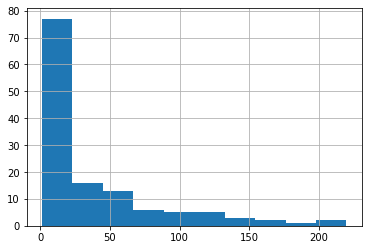

In [10]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

### Quartiles, quantiles, and quintiles

In [11]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


### Variance and standard deviation

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


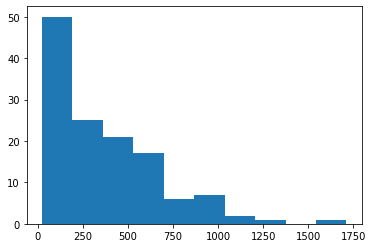

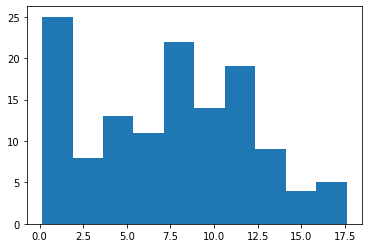

In [13]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std']))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'])
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'])
# Show plot
plt.show()

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


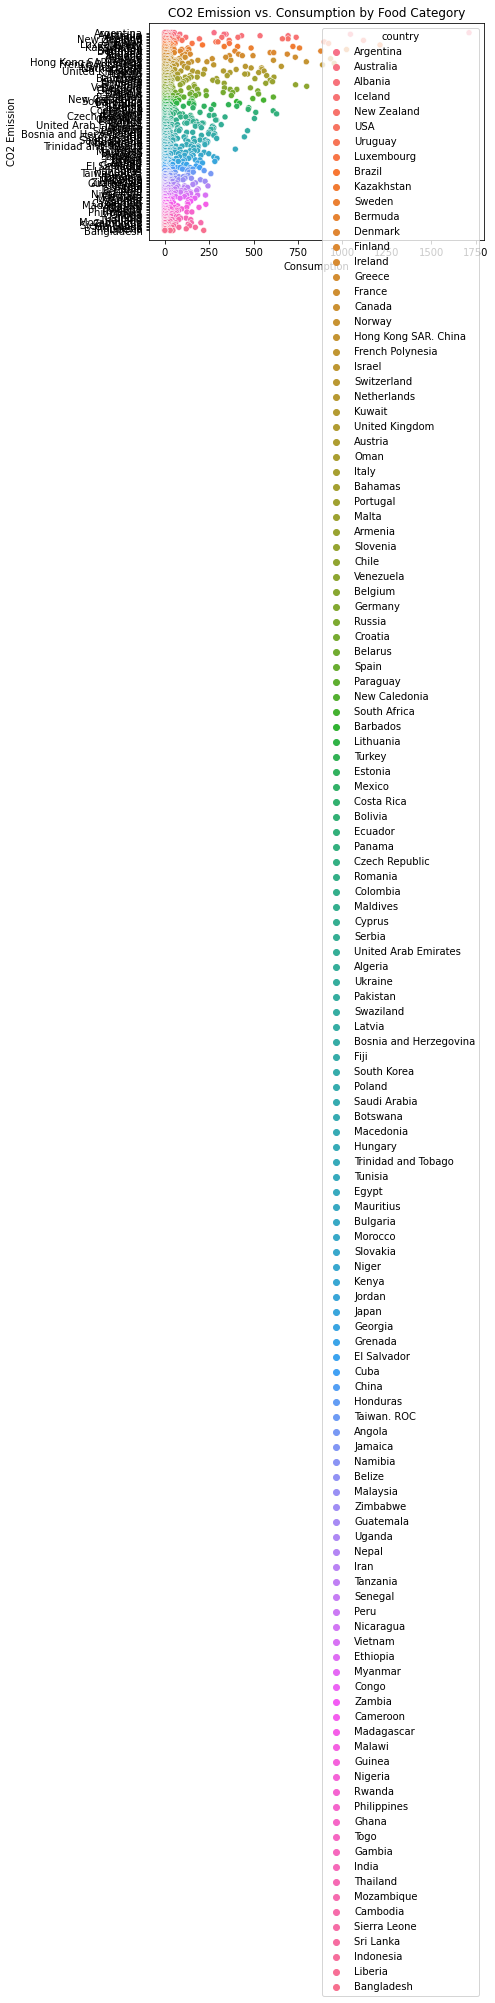

In [23]:
import seaborn as sns
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
print(emissions_by_country)

# Plot the bar graph
sns.scatterplot(data=food_consumption, x='co2_emission', y='country', hue='country')

# Set labels and title
plt.xlabel('Consumption')
plt.ylabel('CO2 Emission')
plt.title('CO2 Emission vs. Consumption by Food Category')

# Display the plot
plt.show()

<AxesSubplot: ylabel='Frequency'>

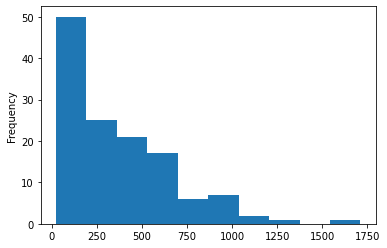

In [9]:
test= food_consumption['co2_emission'][food_consumption['food_category']=="beef"]
test.plot(kind='hist')